In [15]:
import gym
from envs.discrete_bs import BSEnv, decode_action 
from envs import plotting
import numpy as np
import pandas as pd
import math
from collections import defaultdict
import itertools

In [5]:
#actions = np.arange(0, 1, step=0.1)   #vector of actions
actions = np.array([0, 1])
lower = 90
upper = 110
delta_bin = 20
wealth_bins = [0] + np.arange(lower, upper+1, delta_bin).tolist() + [float('Inf')]  # +1 as upper limit is not included

In [6]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions): 
    """ 
    Creates an epsilon-greedy policy based 
    on a given Q-function and epsilon. 
       
    Returns a function that takes the state 
    as an input and returns the probabilities 
    for each action in the form of a numpy array  
    of length of the action space(set of possible actions). 
    """
    def policyFunction(state): 
   
        Action_probabilities = np.ones(num_actions, 
                dtype = float) * epsilon / num_actions 
                  
        best_action = np.argmax(Q[state]) 
        Action_probabilities[best_action] += (1.0 - epsilon) 
        return Action_probabilities 
   
    return policyFunction

In [36]:
def qLearning(env, num_episodes, discount_factor = 1.0, 
                            alpha = 0.9, epsilon = 0.03): 
    """ 
    Q-Learning algorithm: Off-policy TD control. 
    Finds the optimal greedy policy while improving 
    following an epsilon-greedy policy"""
       
    # Action value function 
    # A nested dictionary that maps 
    # state -> (action -> action-value). 
    Q = defaultdict(lambda: np.zeros(env.action_space.n)) 
   
    # Keeps track of useful statistics 
    stats = plotting.EpisodeStats( 
        episode_lengths = np.zeros(num_episodes), 
        episode_rewards = np.zeros(num_episodes))     
       
    # Create an epsilon greedy policy function 
    # appropriately for environment action space 
    policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n) 
       
    # For every episode
    returns=np.array([])
    terminal_wealths = np.array([])
    for ith_episode in range(num_episodes): 
           
        # Reset the environment and pick the first action 
        state = env.reset() 
           
        for t in itertools.count(): 
               
            # get probabilities of all actions from current state 
            action_probabilities = policy(state) 
   
            # choose action according to  
            # the probability distribution 
            action = np.random.choice(np.arange( 
                      len(action_probabilities)), 
                       p = action_probabilities) 
   
            # take action and get reward, transit to next state 
            next_state, reward, done, _ = env.step(action)
            print("t: {}, V_t: {}, action: {}, next state: {}, reward {}, done {}".format(t, env.V_t, decode_action(action, actions), next_state, reward, done))
   
            # Update statistics 
            stats.episode_rewards[ith_episode] += reward 
            stats.episode_lengths[ith_episode] = t
               
            # TD Update 
            best_next_action = np.argmax(Q[next_state])     
            td_target = reward + discount_factor * Q[next_state][best_next_action] 
            td_delta = td_target - Q[state][action] 
            Q[state][action] += alpha * td_delta 
            
            # done is True if episode terminated    
            if done: 
                returns = np.append(returns, reward)
                terminal_wealths=np.append(terminal_wealths, env.V_t)
                break
                   
            state = next_state
        
        if ith_episode % 1000 == 0:
            print("Episode: {}, Mean Return: {}, Mean Wealth (V_T): {}".format(ith_episode, returns.mean(), terminal_wealths.mean()))
            returns = np.array([])
            terminal_wealths=np.array([])
       
    return Q, stats

In [35]:
env = BSEnv(mu=15, sigma=0.2, r=0.02, T=5, dt=1, V_0=100, actions=actions, wealth_bins=wealth_bins)
Q, stats = qLearning(env, 1000)

t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 110.40808032000001, action: 0, next state: (5, 2), reward 4.70418332246899, done True
Episode: 0, Mean Return: 4.70418332246899, Mean Wealth (V_T): 110.40808032000001
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 110.40808032000001, action: 0, next state: (5, 2), reward 4.70418332246899, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, 

t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1

t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_

t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 1664.64, action: 1, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 1731.891456,

t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_

t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t

t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t

t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 1664.64, action: 1, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 1731.891456, action: 0, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 1697.9328, action: 1, next state: (4, 2), reward 0, done False
t: 4, V_t: 1731.891456, action: 0, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V

t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 1664.64, action: 1, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 1731.891456,

t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_

t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t

t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, act

t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, action: 0, next state: (4, 1), reward 0, done False
t: 4, V_t: 1731.891456, action: 1, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 106.1208, action: 0, next state: (3, 1), reward 0, done False
t: 3, V_t: 108.243216, act

t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 1664.64, action: 1, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 1731.891456, action: 0, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 1664.64, action: 1, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 1731.891456, action: 0, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 104.04, action: 0, next state: (2, 1), reward 0, done False
t: 2, V_t: 1664.64, action: 1, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 1731.891456, act

t: 0, V_t: 1600.0, action: 1, next state: (1, 2), reward 0, done False
t: 1, V_t: 1632.0, action: 0, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 1731.891456, action: 0, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 1600.0, action: 1, next state: (1, 2), reward 0, done False
t: 1, V_t: 1632.0, action: 0, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 1731.891456, action: 0, next state: (5, 2), reward 7.456969417412592, done True
t: 0, V_t: 1600.0, action: 1, next state: (1, 2), reward 0, done False
t: 1, V_t: 1632.0, action: 0, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action

t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, acti

t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V

t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 1600.0, action: 1, next state: (1, 2), reward 0, done False
t: 1, V_t: 1632.0, action: 0, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 

t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V

t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V

t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t

t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0

t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V

t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V

t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 26634.24, action: 1, next state: (4, 2), reward 0, done False
t: 4, V_t: 426147.84, action: 1, next state: (5, 2), reward 12.962541607299794, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 166

t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0

t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0

t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1

t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V

t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, acti

t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 26634.24, action: 1, next state: (4, 2), reward 0, done False
t: 4, V_t: 426147.84, action: 1, next state: (5, 2), reward 12.962541607299794, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 166

t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t

t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1

t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 1, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 26634.24, action: 1, next state: (4, 2), reward 0, done False
t: 4, V_t: 27166.9248, action: 0, next state: (5, 2), reward 10.209755512356192, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 1664.64, action: 0, next state: (3, 2), reward 0, done False
t: 3, V_t: 1697.9328, action: 0,

t: 2, V_t: 26112.0, action: 1, next state: (3, 2), reward 0, done False
t: 3, V_t: 26634.24, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 426147.84, action: 1, next state: (5, 2), reward 12.962541607299794, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 26112.0, action: 1, next state: (3, 2), reward 0, done False
t: 3, V_t: 26634.24, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 426147.84, action: 1, next state: (5, 2), reward 12.962541607299794, done True
t: 0, V_t: 102.0, action: 0, next state: (1, 1), reward 0, done False
t: 1, V_t: 1632.0, action: 1, next state: (2, 2), reward 0, done False
t: 2, V_t: 26112.0, action: 1, next state: (3, 2), reward 0, done False
t: 3, V_t: 26634.24, action: 0, next state: (4, 2), reward 0, done False
t: 4, V_t: 426147.84, action: 1, next state: (5, 2), reward 12.962541607299794, done True
t: 0, V_t: 10

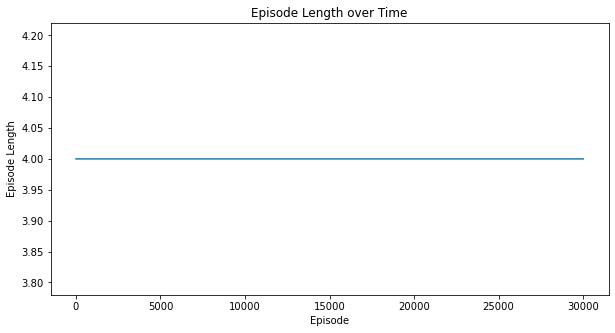

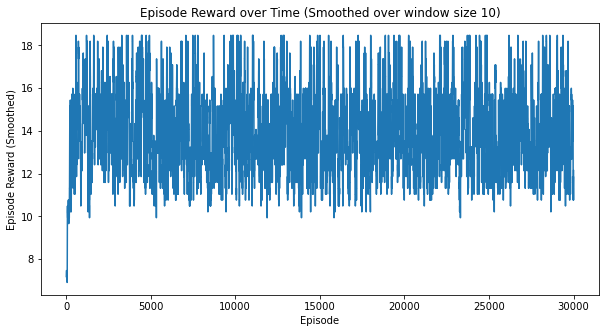

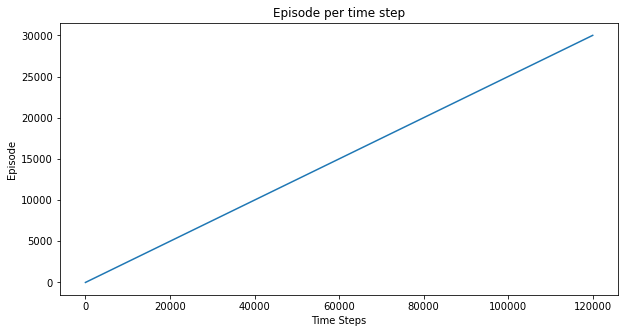

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [29]:
plotting.plot_episode_stats(stats) 

In [160]:
print(len(Q))
print(Q.keys())
print(Q[(0, encode_wealth(100, wealth_bins))])
print(Q[(1, encode_wealth(100, wealth_bins))])
print(Q[(2, encode_wealth(100, wealth_bins))])
print(Q[(3, encode_wealth(100, wealth_bins))])

7
dict_keys([(0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (1, 2), (2, 2)])
[10.1464889  10.19634832]
[ 7.42360776 10.17154863]
[4.66457807 7.41771303]
[0. 0.]


In [161]:
for key in Q.keys():
    print(key)
    print(Q[key])
    print(np.argmax(Q[key]))

(0, 1)
[10.1464889  10.19634832]
1
(1, 1)
[ 7.42360776 10.17154863]
1
(2, 1)
[4.66457807 7.41771303]
1
(3, 1)
[0. 0.]
0
(3, 2)
[0. 0.]
0
(1, 2)
[10.1825632  10.15630771]
0
(2, 2)
[ 7.42277266 10.14983343]
1


In [156]:
print(encode_wealth(80, wealth_bins))


0
